In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
df = pd.read_excel('./Copy of ecology.xlsx')
df.head()

,id,a4a,a6a,a2,a0,b1,b5,b7a,d1a1x,g1a,...,BMGc23i,BMGc23j,BMGc24,BMGc25,BMGc27,BMGd6,BMGd7,BMGe1,BMGe2,BMGe2u
0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,0,Производство Готовых Строительных Металлически...,0,...,1,0,Модернизация машин и оборудования,1,NaN,0,0,100000,20000,Литры
1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,0,Производство Насосов И Компрессоров,0,...,0,0,Модернизация машин и оборудования,0,Не является приоритетом по сравнению с другими...,0,0,160000,18500,Литры
2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,0,"Производство Алюминиевых И Медных Проводов, Си...",100,...,1,0,NaN,0,Нехватка финансовых ресурсов,0,0,Не знаю,Не знаю,NaN
3,50,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2015,0,Строительство жилых и нежилых зданий,0,...,0,0,NaN,0,Операционный и/ или технический риск,0,0,Не знаю,Не знаю,NaN
4,56,Другие Услуги,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,0,Оптовая Продажа Офисной Мебели,0,...,1,0,Модернизация машин и оборудования,0,Нехватка финансовых ресурсов,0,0,100000,10000,Литры


In [13]:
cols = ["BMGc23" + c for c in "abcdefghj"]


In [14]:
# whatever this is, it works (i guess)
def get_index(data):
    index = 0
    try:
        for col in cols:
            index += data[col].values[0]
    except Exception:
        return None
    return index

In [15]:
df['ecology_index'] = df['id'].apply(lambda x: get_index(df[df['id'] == x]))
df['ecology_index']

0       4.0
1       3.0
2       0.0
3       0.0
4       NaN
       ... 
1318    3.0
1319    3.0
1320    1.0
1321    4.0
1322    6.0
Name: ecology_index, Length: 1323, dtype: float64

In [16]:
df.to_csv('ecology_with_new_index.csv')

<Axes: xlabel='ecology_index', ylabel='id'>

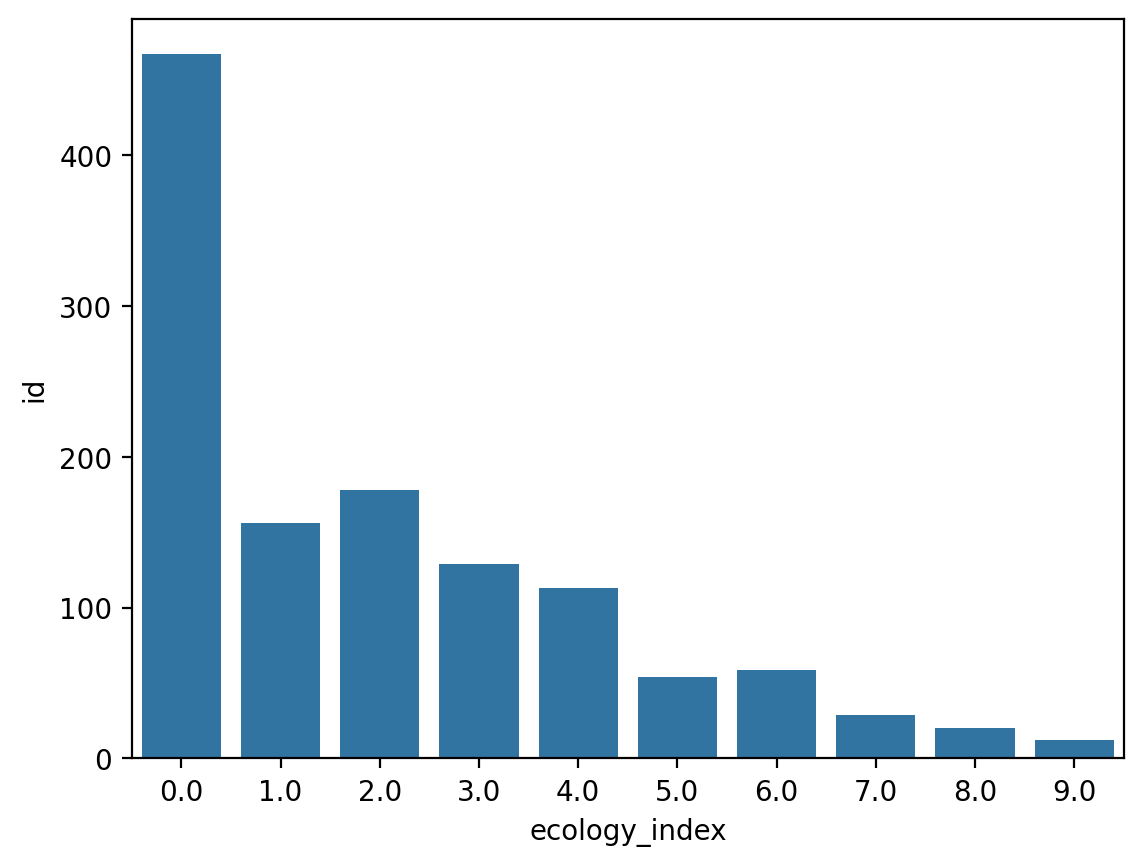

In [17]:
fig, ax = plt.subplots()
sns.barplot(df.groupby('ecology_index').count()['id']) # type: ignore
